In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['figure.figsize'] = 8, 8
from IPython.display import Image
color = 'lightsteelblue'

In [88]:
import pymc3 as pm
import random
import numpy as np
from scipy.stats import beta, binom, bernoulli, poisson
import pandas as pd
import math 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
from collections import Counter

# Chapter 11: Null Hypothesis Significance Testing (NHST)
 
The goal of NHST is to decide whether a particular parameter value can be rejected. To do this, the exacty probabilities of all possibilities need to be calcualted. A p-value is defined as the probability of obtaining a sample outcome from the hypothesized population that is equal to or more extreme than the actual outcome. 

## Calculating P-value

We flip a coin 24 times (N = 24) and get 7 heads (z = 7).
1. We define a bernoulli distribution as the likelihood function for this coin flip model in which $\theta$ is the probability of getting heads. 
2. The possible samples are defined by the stopping condition of the experiment (I).
3. The outcomes are defined by they sampling process.
4. The null hypothesis is the likelihood function with a value for the parameter ($\theta$).

Each sample generated from the null hypothesis is denoted as $D_{\theta,I}$. The probability distribution over all of the samples is the sampling distribution, denoted as $p(D_{\theta,I}|\theta,I)$. The p-value is defined as the number of sample outcomes that are as at least extreme as the observed outcome and can be written as 

$$ p-value = p(D_{\theta,I} \succeq D_{actual}|\theta,I) $$

There are typically three defined p-values; the right tail, the left tail, and the two tail.

$$ p(right) =  p( (z/N)_{\theta,I} \geq (z/N)_{actual}|\theta,I)$$

$$ p(left) =  p( (z/N)_{\theta,I} \leq (z/N)_{actual}|\theta,I)$$

$$ p(two) =  2 * p( (z/N)_{\theta,I} \geq (z/N)_{actual}|\theta,I)$$

If the p-value is less than a previously chosen critical value, the null hypothesis can be rejected. 

One problem with NHST is that a different p-value arises for different experiment types. For example, in the coin flip example, an experimenter can fix N, fix z, or even fix the amount of time. The bayesian interpretation of this problem is completely independent of the sampling method.

## Priors

NHST do not rely on a prior. While the prior assigned by an experimenter can also be arbitrary, it must be convincing to readers. 

## Confidence Intervals and Highest Density Intervals

A confidence interval (CI) is the range parameter values in which the null hypothesis would not be rejected. But, similar to the p-value, the range greatly depends on the experiment conditions. Because confidence intervals are built from p-values, any issue would be present in both.

An analogous concert in bayesian analysis is the Highest Density Interval (HDI). The HDI is defined as the values of $\theta$ that have a level of posterior credibility such that the total probability of all $\theta$s is some value. In the case of a 95% HDI, the total probability of all $\theta$s is 95%. It is essentially a probability distribution with the 95% most credible values of $\theta$ and its associated credibility.

There are three advantages to using an HDI over a CI.

1. The HDI is explicitly about the probability of the parameter given the data while a CI only describes the probability of rejecting the parameter. 
2. The HDI is completely independent of the experiment conditions. 
3. The HDI incorporates the prior belief of the experimenter while the CI does not.

## Multiple Comparisons

When comparing multiple groups using NHST, each comparison can have lead to a false alarm and an increased p-value. For example, consider the false alarm rate $\alpha$. Its complement is the not false alarm rate $1 - \alpha$. Given X independent tests, $(1 - \alpha)^X$ is the probability of not getting a false alarm on all tests. Thus, the probability of getting at least one false alarm is $1 - (1 - \alpha)^X$. Given $\alpha = 0.05$, below is a graph of the probability of getting at least one false alarm. 

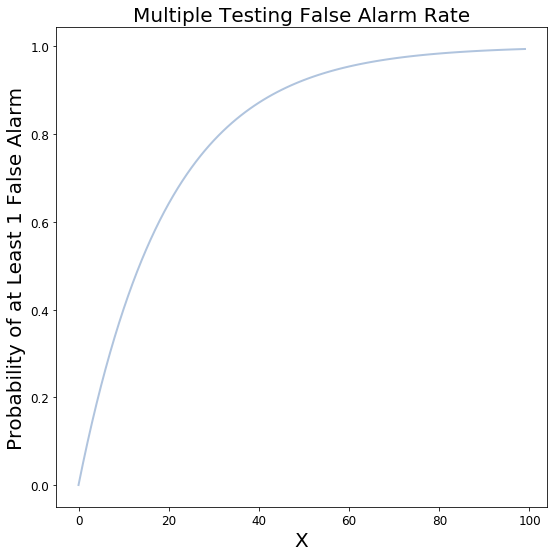

In [12]:
fig, ax = plt.subplots()

alpha = 0.05
f_alarm = lambda x: 1 - (1-alpha)**x

X = range(0,100)
Y = list(map(f_alarm, X))

ax.plot(X,Y, color = color)
ax.set_xlabel(r'X')
ax.set_ylabel(r'Probability of at Least 1 False Alarm')
ax.set_title('Multiple Testing False Alarm Rate')

fig.tight_layout()

At about 40 tests, there is greater than a 80% chance that there is at least one false alarm. When considering thousands of tests, it is guaranteed there is at least one false alarm. 

One method of reducing the false alarm rate is by reducing the criteria for rejecting the null hypothesis. The Bonferroni correction is one such method in which the criteria is reduced by dividing by the number of tests. This correction tends to be too conservative for most 

In a bayesian analysis, multiple testing false alarm rates are not a worry as each data point is completely independent of any other factor in the experiment. In general though, false alarm rates are kept low by incorporating prior knowledge. 

# Chapter 11: Exercises

## Exercise 11.1

We have a six-sided die, and we want to know whether the probability that the six-dotted face comes up is fair. Thus, we are considering two possible outcomes: six-dots or not six-dots. If the die is fair, the probability of the six-dotted face is 1/6.

A. Suppose we roll the die N = 45 times, intending to stop at that number of rolls. Suppose we get 3 six-dot rolls. What is the two-tailed p value? Why consider using the low-tail p-value?

Answer: We consider the low tail because the observed number of six-dot rolls is less than the expected amount (9). The p-value os 0.08. With a critical value of 0.05, we fail to reject the null hypothesis of $\theta = 1/6$.

In [20]:
N = 45
z = 3
theta = 1/6

p = 2 * sum(binom.pmf(x, N, theta) for x in range(0,z+1))
print('p-value =', p)

p-value = 0.0892033442148


B. Suppose that instead of stopping at a fixed N, we stop when we get 3 six-dot outcomes. It takes 45 rolls. (Notice this is the same result as the previous part.) What is the two-tailed p value?

Answer: The two tailed p-value is 0.0313. The p-value is less than than the critical value, thus we reject the null hypothesis that $\theta = 1/6$. The same experiment with the same values led to a different conclusion because of the experiment type.

In [36]:
N = 45
z = 3
theta = 1/6

def nbinom(x,n,p):
    a = z/n
    b = math.factorial(n)/math.factorial(x)/math.factorial(n-x)
    c = p**x * (1-p)**(n-x)
    return a*b*c

prob_n_flips = sum(nbinom(z, x, theta) for x in range(z,N))
prob_less_n_flips = 1 - prob_n_flips
two_tail = 2 * prob_less_n_flips
print('p-value =', two_tail)

p-value = 0.031262731621326756


## Exercise 11.2

Similar to above, N = 45 and z = 3. 

A.If the intention is to stop when N = 45, what is the 95% CI?

Answer: The confidence interval is from [0.014, 0.183]. 

In [64]:
alpha = 0.05
N = 45
z = 3
thetas_low = np.linspace(0,z/N,1000)
thetas_high = np.linspace(z/N,1,1000)

CI = []

for theta in thetas_low:
    p = 2 * sum(binom.pmf(x, N, theta) for x in range(z,N+1))
    if p > alpha:
        CI.append(theta)
        
for theta in thetas_high:
    p = 2 * sum(binom.pmf(x, N, theta) for x in range(0,z+1))
    if p > alpha:
        CI.append(theta)
        
print("CI Bounds = [", min(CI), ',' ,max(CI),']')

CI Bounds = [ 0.014014014014 , 0.182515849183 ]


B. If the intention is to stop when z = 3, what is the 95% CI? Is the CI the same as for stopping when N = 45?

Answer: Answer: The confidence interval is from [0.014, 0.154]. In the previous experiment, $\theta = 1/6$ was in the confidence interval, but now it is not.

In [87]:
alpha = 0.05
N = 45
z = 3
thetas_low = np.linspace(0,z/N,1000)
thetas_high = np.linspace(z/N,1,1000)

def nbinom(x,n,p):
    a = z/n
    b = math.factorial(n)/math.factorial(x)/math.factorial(n-x)
    c = p**x * (1-p)**(n-x)
    return a*b*c

CI = []

for theta in thetas_low:
    p = 2 * sum(nbinom(z, x, theta) for x in range(z,N+1))
    if p > alpha:
        CI.append(theta)
        
for theta in thetas_high:
    p = 2 * (1-sum(nbinom(z, x, theta) for x in range(z,N)))
    if p > alpha:
        CI.append(theta)
        
print("CI Bounds = [", min(CI), ',' ,max(CI),']')

CI Bounds = [ 0.014014014014 , 0.154487821154 ]


## Exercise 11.3

We continue with the scenario of the previous exercises: A dichotomous outcome, with N = 45 and z = 3. Suppose that the die-roller of the previous exercises stopped rolling because time expired at 6 min. For simplicity, suppose that during a 6-min interval, the roller could have rolled N = 40, or N = 41, or N = 42, through N = 50, with equal probability. What is the p value for the observed outcome? Is it the same p value as when assuming fixed N or fixed z?

Answer: The p-value is 0.0586. This p-value is different when compared to the p-value found from assuming a fixed N or a fixed z.

In [119]:
N = 45
z = 3
theta = 1/6
possible_Ns = range(40,51)
Nprob = np.array(range(0,len(possible_Ns)))
Nprob = Nprob/sum(Nprob)

p_value = 0
for i in range(len(possible_Ns)):
    possible_N = possible_Ns[i]
    possible_z = [x for x in range(5) if x/possible_N <= z/N]
    p = 2 * sum(binom.pmf(x, possible_N, theta) for x in possible_z)
    p_value += Nprob[i] * p
    
print("p-value =",p_value)

p-value = 0.0586380841311
